In [33]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [34]:
# Load mnist data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0
X = X.T
Y = mnist.target # 10000 Labels

In [35]:
U, s, Vt = np.linalg.svd(X, full_matrices=False) # economy SVD


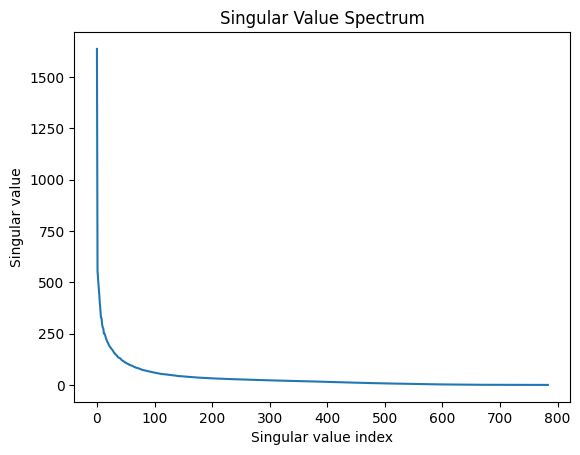

In [36]:
import matplotlib.pyplot as plt

plt.plot(s)
plt.title('Singular Value Spectrum')
plt.xlabel('Singular value index')
plt.ylabel('Singular value')
plt.show()


50 is a good approximation for good image reconstruction.

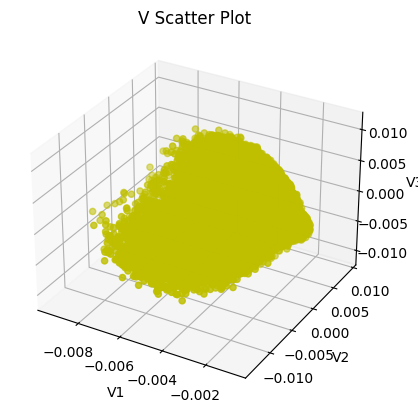

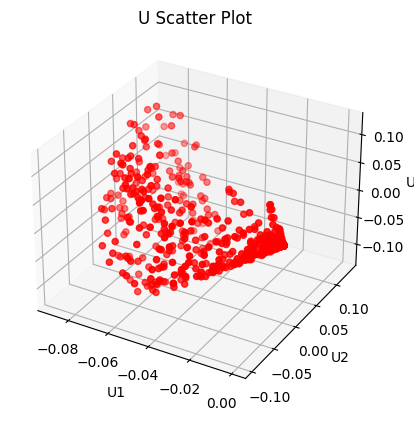

In [37]:

# Plot V
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Vt[0,:], Vt[1,:], Vt[2,:], c='y', marker='o')
ax.set_title('V Scatter Plot')
ax.set_xlabel('V1')
ax.set_ylabel('V2')
ax.set_zlabel('V3')
plt.show() 

# Plot U
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(U[:, 0], U[:, 1], U[:, 2], c='r', marker='o')
ax.set_title('U Scatter Plot')
ax.set_xlabel('U1')
ax.set_ylabel('U2')
ax.set_zlabel('U3')
plt.show()

The columns of U are called left singular vectors of X and the columns of V are right singular vectors. The diagonal elements of $\hat{\Sigma} \in \mathbb{C}^{mxm}$ are called singular values and they ae ordred from largest to smallest. The rank of X is equal to the number of non-zero singular values. 

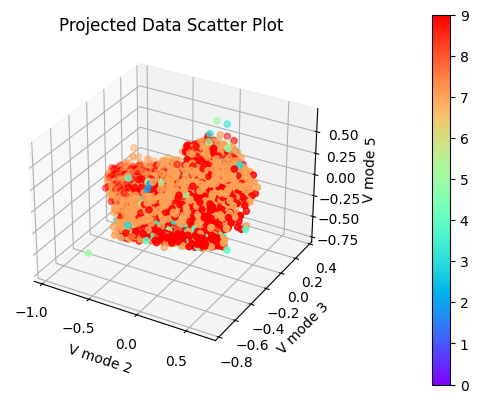

In [38]:
selected_v = Vt[:, [2, 3, 5]]

X_proj = np.dot(X.T, selected_v)

# 3D Plot the projected data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot = ax.scatter(X_proj[:, 0], X_proj[:, 1], X_proj[:, 2], c=Y.astype(int), cmap='rainbow')
plt.colorbar(plot, pad = 0.2)
ax.set_title('Projected Data Scatter Plot')
ax.set_xlabel('V mode 2')
ax.set_ylabel('V mode 3')
ax.set_zlabel('V mode 5')
plt.show()


###Question 2

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [40]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    mnist.data, mnist.target, test_size=0.2, random_state=42)

# Linear classifier with digits 9 and 5

#Training Data
digit1_train_index = np.where(Y_train == '9')[0].tolist()
digit2_train_index = np.where(Y_train == '5')[0].tolist()

digit1_train_data = X_train.values[digit1_train_index , :]
digit2_train_data = X_train.values[digit2_train_index , :]

train_data = np.concatenate((digit1_train_data, digit2_train_data), axis=0)
train_index = digit1_train_index + digit2_train_index
train_labels = Y_train.values[train_index]

#Testing Data
digit1_test_index = np.where(Y_test == '9')[0].tolist()
digit2_test_index = np.where(Y_test == '5')[0].tolist()
test_index = digit1_test_index + digit2_test_index
test_data = X_test.values[test_index, :]
test_labels = Y_test.values[test_index]

# Train LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(train_data, train_labels)

# Evaluate the model on training and testing sets
y_train_pred = lda.predict(train_data)
y_test_pred = lda.predict(test_data)

print("Linear Classifier with Digits {} and {}".format(digit1, digit2))
print("Train Accuracy: {:.4f}".format(accuracy_score(train_labels, y_train_pred)))
print("Test Accuracy: {:.4f}".format(accuracy_score(test_labels, y_test_pred)))

Linear Classifier with Digits 4 and 6
Train Accuracy: 0.9883
Test Accuracy: 0.9851


In [46]:
# Linear classifier with digits 4, 6. 8
# Compute the LDA projection matrix and project training data onto it 


#Training Data
digit1_train_index = np.where(Y_train == '4')[0].tolist()
digit2_train_index = np.where(Y_train == '6')[0].tolist()
digit3_train_index = np.where(Y_train == '8')[0].tolist()

digit1_train_data = X_train.values[digit1_train_index , :]
digit2_train_data = X_train.values[digit2_train_index , :]
digit3_train_data = X_train.values[digit3_train_index , :]

train_data = np.concatenate((digit1_train_data, digit2_train_data, digit3_train_data), axis=0)
train_index = digit1_train_index + digit2_train_index + digit3_train_index
train_labels = Y_train.values[train_index]

In [48]:
lda = LinearDiscriminantAnalysis()
lda.fit(train_data, train_labels)
y_pred = lda.predict(test_data)
y_pred2 = lda.predict(train_data)

print("Train Accuracy: ", accuracy_score(train_labels, y_pred2))
print("Test Accuracy: ", accuracy_score(test_labels, y_pred))

Train Accuracy:  0.9777265278873581
Test Accuracy:  0.46498792687133494


In [43]:
# Dictionary to store the accuracy of each classifier
dict = {}

for i in range(0, 10):
    for j in range(i + 1, 10):
        # Linear classifier with digits i and j
        # Compute the LDA projection matrix and project training data onto it 

        #Training Data
        digit1_train_index = np.where(Y_train == str(i))[0].tolist()
        digit2_train_index = np.where(Y_train == str(j))[0].tolist()

        digit1_train_data = X_train.values[digit1_train_index , :]
        digit2_train_data = X_train.values[digit2_train_index , :]

        train_data = np.concatenate((digit1_train_data, digit2_train_data), axis=0)
        train_index = digit1_train_index + digit2_train_index
        train_labels = Y_train.values[train_index]

        #Testing Data
        digit1_test_index = np.where(Y_test == str(i))[0].tolist()
        digit2_test_index = np.where(Y_test == str(j))[0].tolist()
        test_index = digit1_test_index + digit2_test_index
        test_data = X_test.values[test_index, :]
        test_labels = Y_test.values[test_index]

        lda = LinearDiscriminantAnalysis()
        lda.fit(train_data, train_labels)
        y_pred = lda.predict(test_data)
        x_pred = lda.predict(train_data)

        dict[str(i) + str(j)] = accuracy_score(test_labels, y_pred)
        print("Digits: " + str(i) + " and " + str(j) + " Test Accuracy: ", accuracy_score(test_labels, y_pred) , "Train Accuracy: ", accuracy_score(train_labels, x_pred))

worst_digits = min(dict, key=dict.get)
print("Worst Digits: " + "(" + worst_digits[0] + ", " + worst_digits[1] + ")" + "Test Accuracy: ", dict[worst_digits])

best_digits = max(dict, key=dict.get)
print("Best Digits: " + "(" + best_digits[0] + ", " + best_digits[1] + ")" + "Test Accuracy: ", dict[best_digits])


Digits: 0 and 1 Test Accuracy:  0.9918450560652395 Train Accuracy:  0.9950156289600406
Digits: 0 and 2 Test Accuracy:  0.9853103195005508 Train Accuracy:  0.9888093106535363
Digits: 0 and 3 Test Accuracy:  0.9902737752161384 Train Accuracy:  0.994408945686901
Digits: 0 and 4 Test Accuracy:  0.9950720242608037 Train Accuracy:  0.996212462800974
Digits: 0 and 5 Test Accuracy:  0.985474006116208 Train Accuracy:  0.9885849056603774
Digits: 0 and 6 Test Accuracy:  0.9850310332238043 Train Accuracy:  0.9923007246376812
Digits: 0 and 7 Test Accuracy:  0.9940267041461701 Train Accuracy:  0.9968281938325991
Digits: 0 and 8 Test Accuracy:  0.9851851851851852 Train Accuracy:  0.9892092854552049
Digits: 0 and 9 Test Accuracy:  0.9920376402461093 Train Accuracy:  0.9946837267976212
Digits: 1 and 2 Test Accuracy:  0.978523489932886 Train Accuracy:  0.9866240430722638
Digits: 1 and 3 Test Accuracy:  0.9835146719419716 Train Accuracy:  0.9899874843554443
Digits: 1 and 4 Test Accuracy:  0.9930915371329

In [44]:
# Hardest Digits (5, 8):

# Training Data
digit1_train_index = np.where(Y_train == '5')[0].tolist()
digit2_train_index = np.where(Y_train == '8')[0].tolist()

digit1_train_data = X_train.values[digit1_train_index , :]
digit2_train_data = X_train.values[digit2_train_index , :]

train_data = np.concatenate((digit1_train_data, digit2_train_data), axis=0)
train_index = digit1_train_index + digit2_train_index
train_labels = Y_train.values[train_index]

#Testing Data
digit1_test_index = np.where(Y_test == '5')[0].tolist()
digit2_test_index = np.where(Y_test == '8')[0].tolist()
test_index = digit1_test_index + digit2_test_index
test_data = X_test.values[test_index, :]
test_labels = Y_test.values[test_index]

# SVM Classifier
svm_clf2 = SVC()
svm_clf2.fit(train_data, train_labels)

y_pred2 = svm_clf2.predict(test_data)

print("SVM Accuracy: ", accuracy_score(test_labels, y_pred2))

# Decision Tree Classifier
tree_clf2 = DecisionTreeClassifier()
tree_clf2.fit(train_data, train_labels)

y_pred3 = tree_clf2.predict(test_data)

print("Decision Trees Accuracy: ", accuracy_score(test_labels, y_pred3))

print("LDA Accuracy: ", dict[worst_digits])

SVM Accuracy:  0.988212927756654
Decision Trees Accuracy:  0.9543726235741445
LDA Accuracy:  0.9498098859315589


In [45]:
# Easiest Digits (6, 7):

# Training Data
digit1_train_index = np.where(Y_train == '6')[0].tolist()
digit2_train_index = np.where(Y_train == '7')[0].tolist()

digit1_train_data = X_train.values[digit1_train_index , :]
digit2_train_data = X_train.values[digit2_train_index , :]

train_data = np.concatenate((digit1_train_data, digit2_train_data), axis=0)
train_index = digit1_train_index + digit2_train_index
train_labels = Y_train.values[train_index]

#Testing Data
digit1_test_index = np.where(Y_test == '6')[0].tolist()
digit2_test_index = np.where(Y_test == '7')[0].tolist()
test_index = digit1_test_index + digit2_test_index
test_data = X_test.values[test_index, :]
test_labels = Y_test.values[test_index]

# SVM Classifier
svm_clf3 = SVC()
svm_clf3.fit(train_data, train_labels)

y_pred4 = svm_clf3.predict(test_data)

print("SVM Accuracy: ", accuracy_score(test_labels, y_pred4))

# Decision Tree Classifier
tree_clf3 = DecisionTreeClassifier()
tree_clf3.fit(train_data, train_labels)

y_pred5 = tree_clf3.predict(test_data)

print("Decision Trees Accuracy: ", accuracy_score(test_labels, y_pred5))

print("LDA Accuracy: ", dict[best_digits])


SVM Accuracy:  0.9993101069334254
Decision Trees Accuracy:  0.9931010693342532
LDA Accuracy:  0.9968954812004139
